# THIS CODE WILL DEMONSTRATE HOW TO INCORPORATE FEATURE ENGINEERING FOR "MISSING DATA" AND "HANDLING CATEGORICAL VARIABLES"

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Titanic Dataset and performing Exploratory Data Analysis (EDA) 

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the most frequent categories in categorical variable and if there are more, we can perform OneHotEncoding to first 10 or 20 variables and making the other variables as 0. Check the video by Kris Naik for more details

In [7]:
for col in df.columns:
    print(col, len(df[col].unique()), 'labels')

PassengerId 891 labels
Survived 2 labels
Pclass 3 labels
Name 891 labels
Sex 2 labels
Age 89 labels
SibSp 7 labels
Parch 7 labels
Ticket 681 labels
Fare 248 labels
Cabin 148 labels
Embarked 4 labels


In [8]:
df['Pclass'].value_counts().sort_values(ascending=False).head(20)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
df['Embarked'].value_counts().sort_values(ascending=False).head(20)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['Sex'].value_counts().sort_values(ascending=False).head(20)

male      577
female    314
Name: Sex, dtype: int64

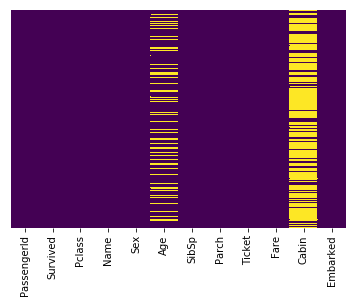

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Calculating the average of age based on Pclass and filling the null values

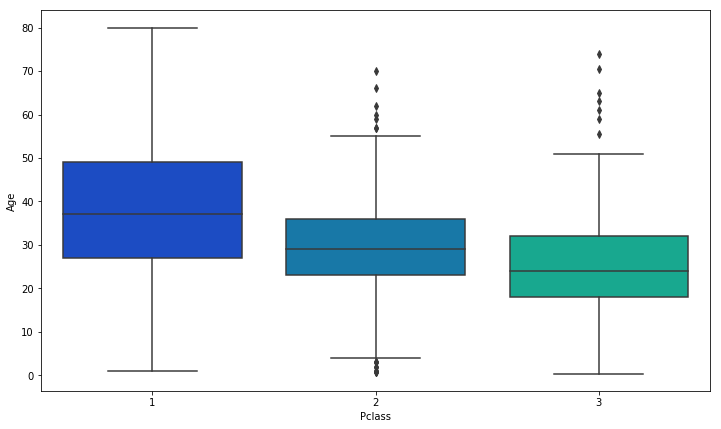

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [13]:
df1 = df[(df['Pclass']==1)]   
df1['Age'].mean()

38.233440860215055

In [14]:
df2 = df[(df['Pclass']==2)]   
df2['Age'].mean()

29.87763005780347

In [15]:
df3 = df[(df['Pclass']==3)]   
df3['Age'].mean()

25.14061971830986

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.2
        elif Pclass == 2:
            return 29.9
        else:
            return 25.1
    else:
        return Age

In [17]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

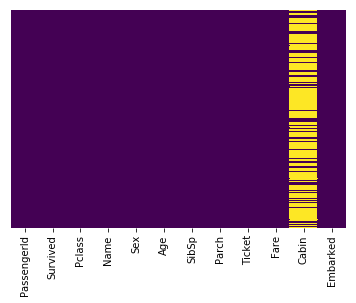

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Dropping Cabin Column since the number of missing data is quite substancial and there is no useful information in the column

In [19]:
df.drop('Cabin',axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


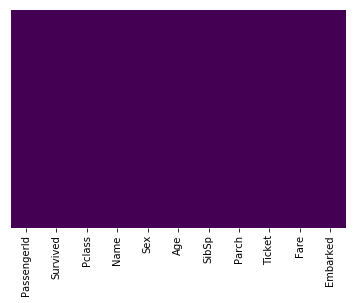

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Dropping the NA Column for embarked since only 2 rows has null values. It can be considered as case of Rare Labels and it is better to drop the rows with NA values

In [22]:
df.dropna(inplace=True)

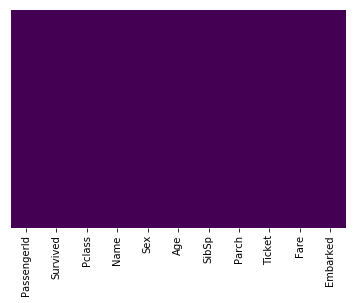

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Converting Categorical Features using get_dummies. I prefer get_dummies in this case due to below reasons:<br>
1. First, the cardinality of the categorical features is low, therefore get_dummies can work better<br>
2. Label encoding has the disadvantage that the numeric values can be misinterpreted as having some sort of hierarchy in them.<br>

In [24]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [25]:
df = pd.concat([df,sex,embark],axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
# Deleting the unnecessary columns
df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## NOW OUR DATA IS READY TO USE LOGISTIC REGRESSION TO SOLVE THE PROBLEM

In [28]:
#Our independent attributes has all the columns except 'Survived'. Dependent column has 'Survived' 
X = df.drop('Survived',axis=1).values
y = df['Survived'].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## TESTING THE MODEL

In [33]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

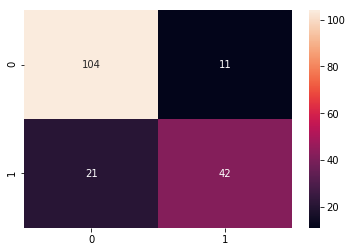

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.83      0.90      0.87       115
          1       0.79      0.67      0.72        63

avg / total       0.82      0.82      0.82       178

